In [1]:
include("../encoding.jl")
include("../plotting.jl")

visualize_pxy (generic function with 2 methods)

In [2]:
using LinearAlgebra

In [3]:
# returns model params
function solve_ridge(X::AbstractMatrix,B;λ=1)
    F =  inv(X'*X + λ*I)*X'*B
    return D*F
end
function solve_ridge(X::AbstractMatrix,B, W;λ=1)
    WX = W .* X
    F =  inv(X'*WX + λ*I)*WX'*B
    return D*F
end
function finite_diff(X; h=1)
    res = zero(X)
    for i in 1:size(X,1)
        l = max(i-h, 1)
        u = min(i+h, size(X,1))
        res[i,:] = (X[u,:] - X[l,:]) / (u - l) * m
    end
    return res
end

finite_diff (generic function with 1 method)

In [4]:
D,l = 2_000, 0.1
bipolar=false
encoder = realvalue_encoder(l,D, bipolar=bipolar);

In [5]:
x = range(0,1, length=200)
Δx = encode(encoder, x);

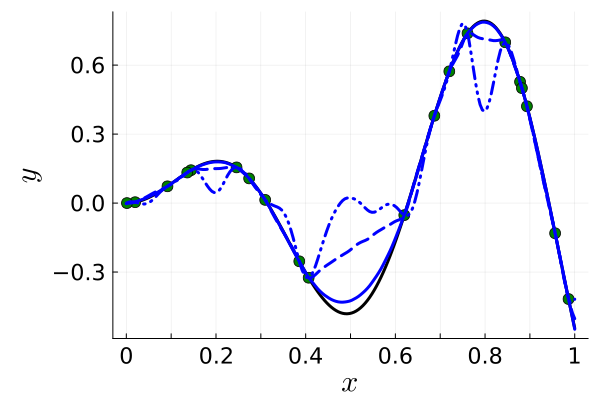

In [25]:
f(x) =  x*sin(10*x) #* sign(x-0.5)
xs = rand(20)
fs = f.(xs);

X = encode(encoder,xs);
B = fs
F = solve_ridge(X,B, λ=1);

m = 100
xi = range(0,1, length=m)
Δxi = encode(encoder, xi);
dΔxi = finite_diff(Δxi);
d²Δxi = finite_diff(dΔxi);

Xc = vcat(X, dΔxi)
Bc = vcat(B, zeros(m))
Wc = vcat(ones(length(xs)), 1e-6*ones(m)) # the weigths of both equations
F_constant = solve_ridge(Xc,Bc,Wc, λ=1);

Xc = vcat(X, d²Δxi)
Bc = vcat(B, zeros(m))
Wc = vcat(ones(length(xs)), 1e-8*ones(m)) # the weigths of both equations
F_linear = solve_ridge(Xc,Bc,Wc, λ=1);

xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0]

pl = plot(xticks=(xvalues, xmarks), xlabel=L"x", ylabel=L"y")
plot!(x, f.(x), c=:black, linewidth=3,legend=false)
scatter!(xs, fs, c=:green, markersize=7)
plot!(x, Δx*F / D, linewidth=3, c =:blue, linestyle=:dashdotdot, label=L"$\tilde{f}(x)$")
plot!(x, Δx*F_constant / D, linewidth=3,  c =:blue, linestyle=:dash,label=L"$\tilde{f}(x)$")
plot!(x, Δx*F_linear / D, linewidth=3,  c =:blue, linestyle=:solid, label=L"$\tilde{f}(x)$")
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)

save(pl,"sin10")
pl

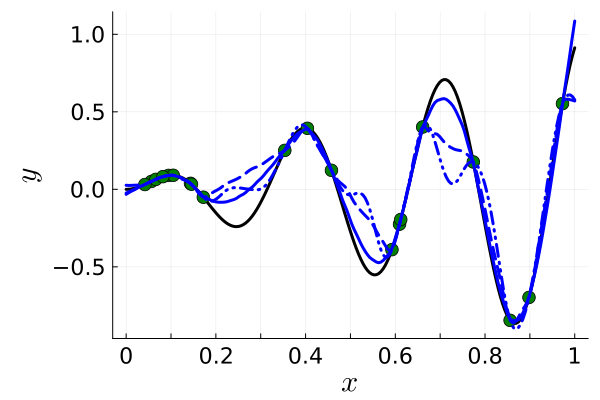

In [35]:
f(x) =  x*sin(20*x) #* sign(x-0.5)
xs = rand(20)
fs = f.(xs);

X = encode(encoder,xs);
B = fs
F = solve_ridge(X,B, λ=1);

m = 100
xi = range(0,1, length=m)
Δxi = encode(encoder, xi);
dΔxi = finite_diff(Δxi);
d²Δxi = finite_diff(dΔxi);

Xc = vcat(X, dΔxi)
Bc = vcat(B, zeros(m))
Wc = vcat(ones(length(xs)), 1e-6*ones(m)) # the weigths of both equations
F_constant = solve_ridge(Xc,Bc,Wc, λ=1);

Xc = vcat(X, d²Δxi)
Bc = vcat(B, zeros(m))
Wc = vcat(ones(length(xs)), 1e-8*ones(m)) # the weigths of both equations
F_linear = solve_ridge(Xc,Bc,Wc, λ=1);

xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0]

pl = plot(xticks=(xvalues, xmarks), xlabel=L"x", ylabel=L"y")
plot!(x, f.(x), c=:black, linewidth=3,legend=false)
scatter!(xs, fs, c=:green, markersize=7)
plot!(x, Δx*F / D, linewidth=3, c =:blue, linestyle=:dashdotdot, label=L"$\tilde{f}(x)$")
plot!(x, Δx*F_constant / D, linewidth=3,  c =:blue, linestyle=:dash,label=L"$\tilde{f}(x)$")
plot!(x, Δx*F_linear / D, linewidth=3,  c =:blue, linestyle=:solid, label=L"$\tilde{f}(x)$")
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)

save(pl,"sin20")
pl

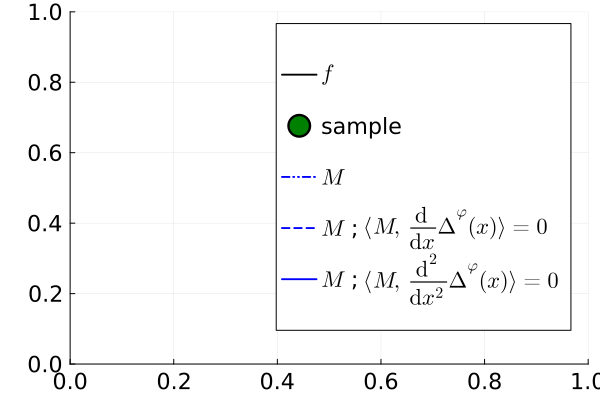

In [129]:
# generate the guide for previous figures
guide = plot([2],[2],xlim=(0,1), ylim=(0,1), legendfontsize=15, c=:black, label=L"f")
scatter!([2], [2], c=:green, marker_size=5, label="sample")
plot!([], [], linewidth=3, c =:blue, linestyle=:dashdotdot, label=L"$M$")
plot!([], [], linewidth=3,  c =:blue, linestyle=:dash,label=L"$M$ ; $\langle M, \frac{\mathrm{d}}{\mathrm{d}x} \Delta^{\varphi}(x) \rangle=0$")
plot!([], [], linewidth=3,  c =:blue, linestyle=:solid,label=L"$M$ ; $\langle M, \frac{\mathrm{d^2}}{\mathrm{d}x^2} \Delta^{\varphi}(x) \rangle=0$")
plot!(guidefontsize=10, tickfontsize=15,left_margin = 5Plots.mm)
save(guide, "legend")
guide